<a href="https://colab.research.google.com/github/anamunoz01/PROYECTO-INTEGRADOR-III/blob/main/ValidacionCruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MODELO PREDICTIVO DE ATAQUES AL CORAZÓN CON REDES NEURONALES** 

**Proyecto Integrador III**

- Elena Gómez

- Ana Muñoz

- Inés Sánchez

- Miriam Toledo


## **Objetivo**

Vamos a predecir la posibilidad de sufrir un ataque al corazón dependiendo de diferentes características relacionadas con la salud del paciente.  

Para ello creamos un modelo de clasificación binaria, con el que obtendremos una salida que será 0 o 1.
- 0 significará que la probabilidad de sufrir un ataque al corazón es muy baja.
-1 será el caso contrario, es decir, que la probabilidad es alta.

La base de datos que utilizaremos la encontramos en kaggle.com, como Health care: Heart attack possibility. 

Las características que vamos a estudiar son las siguientes:
1. Edad
2. Sexo
3. Tipo de dolor de pecho (4 tipos)
4. Presión en sangre
5. Colesterol en mg/dl
6. Azúcar en sangre > 120 mg/dl
7. Resultado electrocardiograma (valores 0, 1, 2)
8. Frecuencia cardiaca máxima alcanzada
9. Angina de pecho (inducida por el ejercicio)
10. Depresión del ST inducida por el ejercicio en relación con el reposo
11. La pendiente del segmento ST máximo del ejercicio
12. Número de vasos mayores (0-3) coloreados por la fluoroscopia
13. thal: 0 = normal; 1 = defecto fijo; 2 = defecto reversible
14. objetivo: 0= menos posibilidades de infarto 1= más posibilidades de infarto

## **Estudio y análisis de datos**

In [1]:
import keras
keras.__version__

'2.8.0'

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel('dataset heart attack.xlsx')


In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### **GRAFICAS**

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

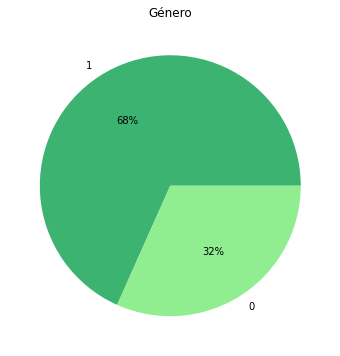

In [5]:
x = df['sex'].value_counts()
grupos = pd.unique(df['sex']) 

fig = plt.figure(figsize =(6, 6))
plt.pie(x, labels = grupos, colors = ['mediumseagreen', 'lightgreen'], autopct='%1.0f%%')
plt.title('Género')
plt.show()

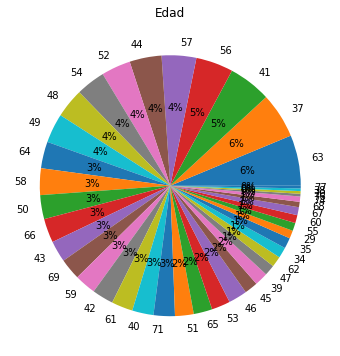

In [6]:
x = df['age'].value_counts()
grupos = pd.unique(df['age']) 

fig = plt.figure(figsize =(6, 6))
plt.pie(x, labels = grupos, autopct='%1.0f%%')
plt.title('Edad')
plt.show()

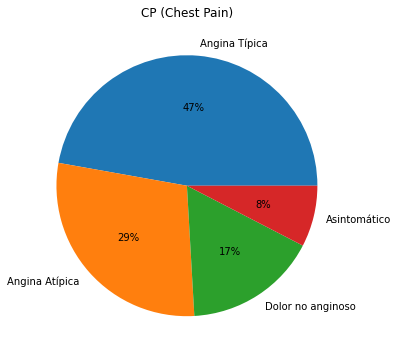

In [7]:
grupos = ['Angina Típica', 'Angina Atípica', 'Dolor no anginoso', 'Asintomático']
x = df['cp'].value_counts()

fig = plt.figure(figsize =(6, 6))
plt.pie(x, labels = grupos, autopct='%1.0f%%')
plt.title('CP (Chest Pain)')
plt.show()

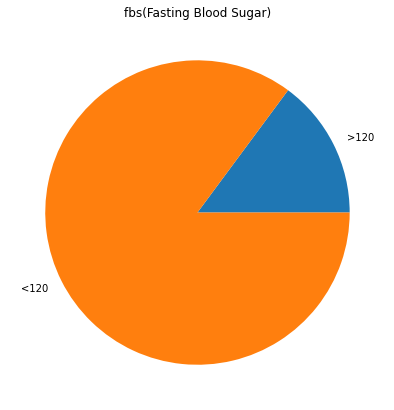

In [8]:
grupos = ['>120', '<120']
data = [ 45, 258]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = grupos)
plt.title('fbs(Fasting Blood Sugar)')
plt.show()

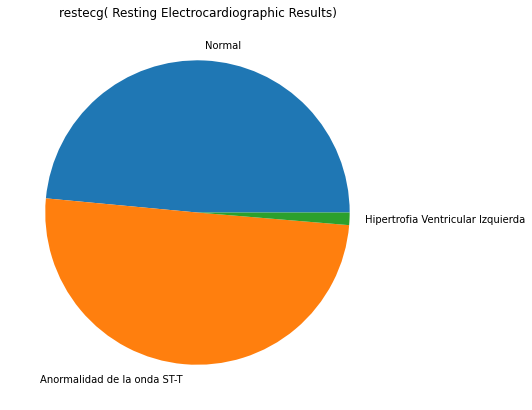

In [9]:
grupos = ['Normal', 'Anormalidad de la onda ST-T', 'Hipertrofia Ventricular Izquierda']
data = [ 147, 152, 4]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = grupos)
plt.title('restecg( Resting Electrocardiographic Results)')
plt.show()

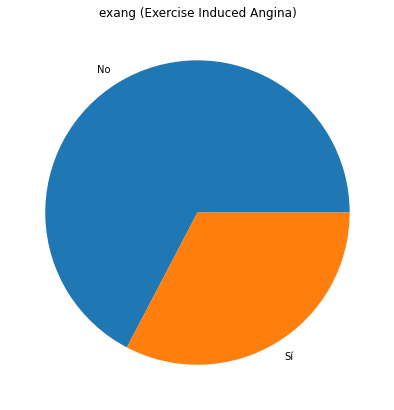

In [10]:
grupos = ['No', 'Sí']
data = [ 204, 99]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = grupos)
plt.title('exang (Exercise Induced Angina)')
plt.show()

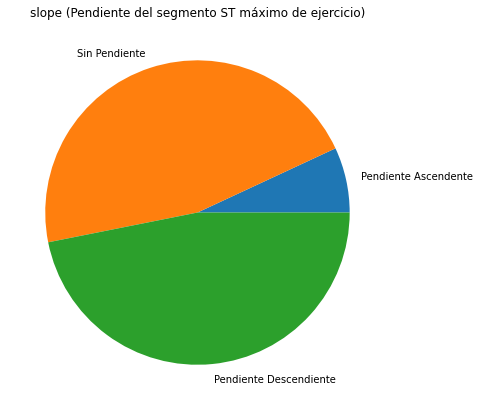

In [11]:
grupos = ['Pendiente Ascendente', 'Sin Pendiente', 'Pendiente Descendiente']
data = [21, 140, 142]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = grupos)
plt.title('slope (Pendiente del segmento ST máximo de ejercicio)')
plt.show()

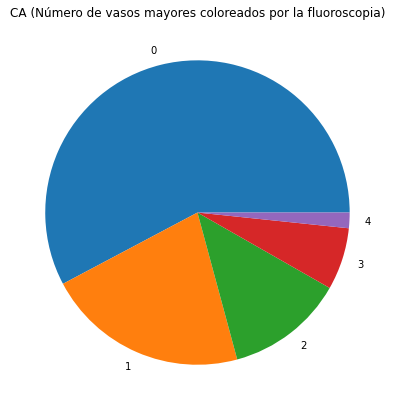

In [12]:
grupos = ['0', '1', '2', '3', '4']
data = [175, 65, 38, 20, 5]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = grupos)
plt.title('CA (Número de vasos mayores coloreados por la fluoroscopia)')
plt.show()

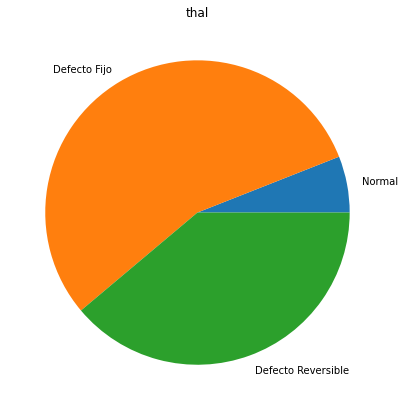

In [13]:
grupos = ['Normal', 'Defecto Fijo', 'Defecto Reversible']
data = [18, 166, 117]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = grupos)
plt.title('thal')
plt.show()

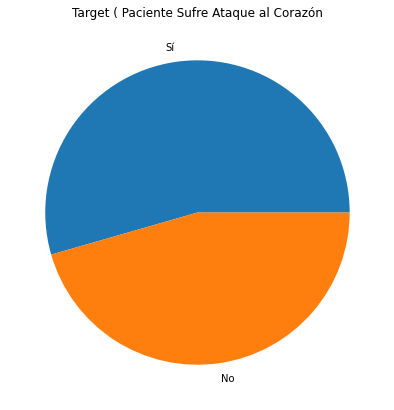

In [14]:
grupos = ['Sí', 'No']
data = [165, 138]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = grupos)
plt.title('Target ( Paciente Sufre Ataque al Corazón')
plt.show()


###**Preprocesamiento**

Creamos dos dataframes nuevos separando variables numéricas de categóricas 

In [15]:
continuas = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
continuas

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


Normalizamos las continuas

In [16]:
mean = continuas.mean(axis=0)
#print(mean)
#continuas -= mean
std = continuas.std(axis=0)
#print(std)
continuas /= std

continuas

,age,trestbps,chol,thalach,oldpeak
0,6.936721,8.267694,4.495401,6.548742,1.980923
1,4.073947,7.412415,4.823391,8.164099,3.014448
2,4.514374,7.412415,3.935887,7.509225,1.205779
3,6.165974,6.842230,4.553282,7.771174,0.689017
4,6.276081,6.842230,6.829922,7.116300,0.516762
...,...,...,...,...,...
298,6.276081,7.982601,4.649749,5.369969,0.172254
299,4.954801,6.272044,5.093501,5.762893,1.033525
300,7.487254,8.210676,3.723658,6.155818,2.928321
301,6.276081,7.412415,2.527457,5.020703,1.033525


In [17]:
clases = df[['sex', 'fbs', 'exang', 'cp', 'restecg', 'slope', 'ca', 'thal']]
clases

,sex,fbs,exang,cp,restecg,slope,ca,thal
0,1,1,0,3,0,0,0,1
1,1,0,0,2,1,0,0,2
2,0,0,0,1,0,2,0,2
3,1,0,0,1,1,2,0,2
4,0,0,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...
298,0,0,1,0,1,1,0,3
299,1,0,0,3,1,1,0,3
300,1,1,0,0,1,1,2,3
301,1,0,1,0,1,1,1,3


Vectorizamos las variables categóricas y las unimos al dataframe con las variables continuas ya normalizadas

In [18]:

normalizado = continuas
for i in clases:
  y = pd.get_dummies(df[i] ,prefix = i)
  #print(y)
  normalizado = normalizado.join(y)


normalizado = normalizado.join(df['target'])
normalizado 

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,fbs_0,fbs_1,exang_0,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target
0,6.936721,8.267694,4.495401,6.548742,1.980923,0,1,0,1,1,...,1,0,0,0,0,0,1,0,0,1
1,4.073947,7.412415,4.823391,8.164099,3.014448,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,1
2,4.514374,7.412415,3.935887,7.509225,1.205779,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1
3,6.165974,6.842230,4.553282,7.771174,0.689017,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,1
4,6.276081,6.842230,6.829922,7.116300,0.516762,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,6.276081,7.982601,4.649749,5.369969,0.172254,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
299,4.954801,6.272044,5.093501,5.762893,1.033525,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
300,7.487254,8.210676,3.723658,6.155818,2.928321,0,1,0,1,1,...,0,0,1,0,0,0,0,0,1,0
301,6.276081,7.412415,2.527457,5.020703,1.033525,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [19]:
from keras.utils.np_utils import to_categorical

In [20]:
train_data = normalizado.sample(frac=0.8,random_state=0)
# El resto de datos los almacenamos en test_data:
test_data = normalizado.drop(train_data.index)

In [21]:
train_data

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,fbs_0,fbs_1,exang_0,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target
225,7.707468,8.267694,3.357080,5.457285,2.239304,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
152,7.046828,9.693159,4.379639,6.767034,0.516762,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,1
228,6.496294,9.693159,5.556547,6.941667,0.172254,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
201,6.606401,7.127323,4.977740,6.155818,2.411558,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
52,6.826614,7.412415,4.456814,6.374109,1.550287,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,6.606401,5.815895,6.135354,6.985325,0.000000,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,1
285,5.064907,7.982601,6.000299,5.238994,1.550287,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
11,5.285121,7.412415,5.305731,6.068501,0.172254,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1
119,5.064907,7.868564,4.688336,6.636059,0.000000,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


In [22]:
train_labels = train_data.pop('target')
test_labels = test_data.pop('target')

##Creamos la red

In [23]:
import tensorflow as tf

from keras import models
from keras import layers

###**RMSPROP**

In [24]:
modelo1 = models.Sequential()
modelo1.add(layers.Dense(16, activation='relu', input_shape=(30,)))
modelo1.add(layers.Dense(16, activation='relu'))
modelo1.add(layers.Dense(1, activation='sigmoid'))

In [25]:
modelo1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Validación**

In [26]:
k = 3
num_val_samples = len(train_data) // k
print("num_val_samples", num_val_samples)
num_epochs = 100
all_acc = []
all_loss = []
for i in range(k):
    print('processing fold #', i)
    # Preparamos la validación de los datos: datos de la partición #k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparamos los datos de entrenamiento: Datos de las demás particiones
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_labels = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)

    # Construcción del modelo Keras (ya compilado)
    model = modelo1
    # Entrenando el modelo (en modo silencioso, verbose=0)
    model.fit(partial_train_data, partial_train_labels,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evalua el modelo sobre los datos de validación
    loss, acc = model.evaluate(val_data, val_labels, verbose=0)
    all_acc.append(acc)
    all_loss.append(loss)

num_val_samples 80
processing fold # 0
processing fold # 1
processing fold # 2


In [27]:
print(all_acc)
print(all_loss)

[0.824999988079071, 0.8125, 0.8999999761581421]
[0.8463543057441711, 0.7823804616928101, 0.5769525766372681]


In [28]:
print(np.mean(all_acc))
print(np.mean(all_loss))

0.8458333214124044
0.7352291146914164


In [29]:
#Lo entrenamos en todos los datos.
test_lossRP, test_accRP = modelo1.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 8ms/step - loss: 3.2476 - accuracy: 0.7541


In [30]:
resultsRP = [test_lossRP, test_accRP]

resultsRP

[3.2476093769073486, 0.7540983557701111]

In [31]:
predicciones = model.predict(test_data)
print(predicciones)

# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

[[9.99999881e-01]
 [1.00000000e+00]
 [9.99907732e-01]
 [9.99604881e-01]
 [1.00000000e+00]
 [8.97463560e-01]
 [1.00000000e+00]
 [9.99999642e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.29365585e-09]
 [9.99999881e-01]
 [1.00000000e+00]
 [9.99981523e-01]
 [1.00000000e+00]
 [2.83251673e-01]
 [1.00000000e+00]
 [4.64132689e-02]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99981642e-01]
 [1.00000000e+00]
 [2.99153835e-01]
 [8.71749173e-10]
 [9.99999523e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99998689e-01]
 [1.04162871e-06]
 [1.00000000e+00]
 [1.62076554e-04]
 [4.15646965e-25]
 [9.99999881e-01]
 [5.29593661e-28]
 [8.19929361e-01]
 [2.90758162e-15]
 [1.00323210e-04]
 [3.22072126e-04]
 [4.03853335e-07]
 [3.32455099e-25]
 [1.09990115e-08]
 [3.09724002e-09]
 [9.34629679e-01]
 [3.16033153e-22]
 [3.48439222e-10]
 [9.34400235e-13]
 [2.11658445e-03]
 [4.67080147e-18]
 [1.00000000e+00]
 [6.48231534e-26]
 [8.06512058e-01]
 [9.99997258e-01]
 [2.90466414e-04]
 [4.33707470e-03]
 [9.998754

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]])

In [32]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [33]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
from keras.utils.np_utils import to_categorical

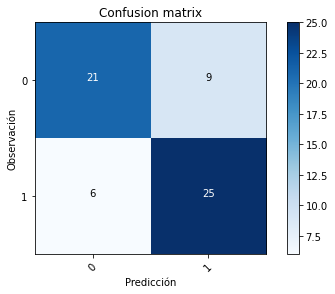

In [34]:

ytrue = test_labels.tolist()

confusion_mtx = confusion_matrix(ytrue, clasificacion) 
plot_confusion_matrix(confusion_mtx, classes = range(2))

### **ADAGRAD**

In [35]:
modelADA = models.Sequential()
modelADA.add(layers.Dense(16, activation='relu', input_shape=(30,)))
modelADA.add(layers.Dense(16, activation='relu'))
modelADA.add(layers.Dense(1, activation='sigmoid'))

In [36]:
modelADA.compile(optimizer='adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])

VALIDACIÓN

In [37]:
import numpy as np

k = 3
num_val_samples = len(train_data) // k
print("num_val_samples", num_val_samples)
num_epochs = 100
all_acc = []
all_loss = []
for i in range(k):
    print('processing fold #', i)
    # Preparamos la validación de los datos: datos de la partición #k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparamos los datos de entrenamiento: Datos de las demás particiones
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_labels = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)

    # Construcción del modelo Keras (ya compilado)
    model = modelADA
    # Entrenando el modelo (en modo silencioso, verbose=0)
    model.fit(partial_train_data, partial_train_labels,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evalua el modelo sobre los datos de validación
    loss, acc = model.evaluate(val_data, val_labels, verbose=0)
    all_acc.append(acc)
    all_loss.append(loss)

num_val_samples 80
processing fold # 0
processing fold # 1
processing fold # 2


In [38]:
print(np.mean(all_acc))
print(np.mean(all_loss))

0.825000007947286
0.42135245601336163


In [39]:
# Lo entrenamos en todos los datos.
test_lossADA, test_accADA = model.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 7ms/step - loss: 0.4344 - accuracy: 0.7869


In [40]:
resultsADA = [test_lossADA, test_accADA]

resultsADA

[0.43435564637184143, 0.7868852615356445]

In [41]:
prediccionesADA = modelADA.predict(test_data)
print(prediccionesADA)

# Clasificación predicha
# ==============================================================================
clasificacionADA = np.where(prediccionesADA<0.5, 0, 1)
clasificacionADA

[[0.70607626]
 [0.85291225]
 [0.4204591 ]
 [0.64316195]
 [0.6472257 ]
 [0.5383996 ]
 [0.9020971 ]
 [0.82931256]
 [0.8477003 ]
 [0.86838746]
 [0.17064667]
 [0.90004224]
 [0.87493324]
 [0.8845822 ]
 [0.8986469 ]
 [0.6506403 ]
 [0.9313089 ]
 [0.39165005]
 [0.72408694]
 [0.6643916 ]
 [0.85519475]
 [0.49895138]
 [0.91361564]
 [0.42077732]
 [0.10459804]
 [0.8208564 ]
 [0.8916606 ]
 [0.8684747 ]
 [0.8728505 ]
 [0.24973272]
 [0.90704924]
 [0.10164364]
 [0.13030118]
 [0.5600154 ]
 [0.03265673]
 [0.8649014 ]
 [0.17388757]
 [0.7975692 ]
 [0.08693695]
 [0.09437815]
 [0.02274353]
 [0.07890173]
 [0.18546087]
 [0.31062403]
 [0.00813809]
 [0.23051785]
 [0.13939197]
 [0.04171508]
 [0.05035621]
 [0.4037324 ]
 [0.11371884]
 [0.3324419 ]
 [0.78031445]
 [0.19340742]
 [0.35952166]
 [0.6237037 ]
 [0.78804743]
 [0.25408083]
 [0.04042157]
 [0.06091703]
 [0.06009457]]


array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [44]:
print('predicción = ',  prediccionesADA[2])
print('clasificación = ', clasificacionADA[2])

predicción =  [0.4204591]
clasificación =  [0]


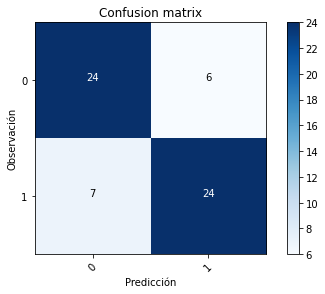

In [45]:
ytrue = test_labels.tolist()

confusion_mtxADA = confusion_matrix(ytrue, clasificacionADA) 
plot_confusion_matrix(confusion_mtxADA, classes = range(2))

###**ADAM**

In [46]:
model3 = models.Sequential()
# Entrada, un tensor con la crítica vectorizada (10000 valores)
model3.add(layers.Dense(16, activation='relu', input_shape=(30,)))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [47]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

VALIDACIÓN

In [48]:
import numpy as np

k = 3
num_val_samples = len(train_data) // k
print("num_val_samples", num_val_samples)
num_epochs = 100
all_acc = []
all_loss = []
for i in range(k):
    print('processing fold #', i)
    # Preparamos la validación de los datos: datos de la partición #k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparamos los datos de entrenamiento: Datos de las demás particiones
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_labels = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)

    # Construcción del modelo Keras (ya compilado)
    model = model3
    # Entrenando el modelo (en modo silencioso, verbose=0)
    model.fit(partial_train_data, partial_train_labels,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evalua el modelo sobre los datos de validación
    loss, acc = model.evaluate(val_data, val_labels, verbose=0)
    all_acc.append(acc)
    all_loss.append(loss)

num_val_samples 80
processing fold # 0
processing fold # 1
processing fold # 2


In [49]:
print(np.mean(all_acc))
print(np.mean(all_loss))

0.8583333293596903
0.8956284920374552


In [50]:
# Lo entrenamos en todos los datos.
test_lossADAM, test_accADAM = model.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 7ms/step - loss: 2.9167 - accuracy: 0.7869


In [51]:
resultsADAM = [test_lossADAM, test_accADAM]

resultsADAM

[2.9166834354400635, 0.7868852615356445]

In [52]:
prediccionesADAM = model3.predict(test_data)
print(prediccionesADAM)

# Clasificación predicha
# ==============================================================================
clasificacionADAM = np.where(prediccionesADAM<0.5, 0, 1)
clasificacionADAM

[[9.99995589e-01]
 [1.00000000e+00]
 [5.82235989e-05]
 [9.99999881e-01]
 [1.00000000e+00]
 [9.97958302e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99966264e-01]
 [9.99466240e-01]
 [6.81458179e-09]
 [9.99761760e-01]
 [1.00000000e+00]
 [6.05630815e-01]
 [1.00000000e+00]
 [8.25236738e-03]
 [1.00000000e+00]
 [9.95710015e-01]
 [1.00000000e+00]
 [9.99999881e-01]
 [1.00000000e+00]
 [7.09782362e-01]
 [1.00000000e+00]
 [4.54769731e-01]
 [8.70672115e-18]
 [9.99857783e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99858618e-01]
 [3.86797998e-04]
 [1.00000000e+00]
 [3.32547941e-16]
 [5.24960392e-13]
 [1.21376224e-01]
 [1.18721140e-24]
 [2.22889101e-03]
 [3.41735053e-04]
 [5.11277497e-01]
 [1.00849578e-02]
 [6.47170991e-02]
 [1.77833576e-26]
 [3.18816740e-12]
 [1.22422632e-03]
 [9.96465921e-01]
 [2.72971836e-18]
 [1.22610754e-05]
 [4.53409914e-24]
 [8.20283640e-06]
 [2.30609458e-16]
 [1.00000000e+00]
 [1.76538786e-12]
 [9.92114961e-01]
 [9.99988556e-01]
 [1.02503764e-05]
 [1.72712386e-01]
 [9.999983

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

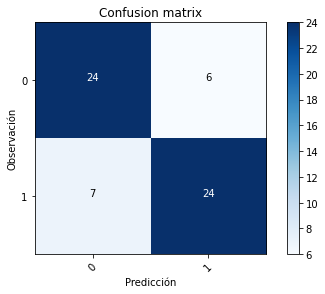

In [53]:
ytrue = test_labels.tolist()

confusion_mtxADAM = confusion_matrix(ytrue, clasificacionADA) 
plot_confusion_matrix(confusion_mtxADAM, classes = range(2))

## **COMPARACIÓN**

In [54]:
numero = len(resultsRP)
indice_barras = np.arange(numero)
#indice_barras

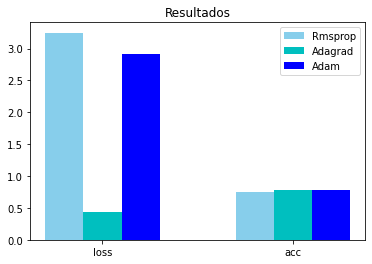

In [55]:
x = ['loss', 'acc']
res = [resultsRP, resultsADA, resultsADAM]
plt.bar(indice_barras, resultsRP, width = 0.2, label = 'Rmsprop', color = 'skyblue')
plt.bar(indice_barras + 0.2, resultsADA, width = 0.2, label = 'Adagrad', color = 'c')
plt.bar(indice_barras + 0.4, resultsADAM, width = 0.2, label = 'Adam', color = 'b')

plt.xticks(indice_barras + 0.2, ('loss', 'acc'))
plt.legend(loc='best')
plt.title('Resultados')
plt.show()